In [22]:
import sys
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
np.set_printoptions(threshold=sys.maxsize)

In [23]:
class RNN():
    def __init__(self, layers, p):
        model = keras.Sequential()
        for _ in range(layers):
            layer = keras.layers.SimpleRNN(units=16, return_sequences=True, input_shape=(p, p+1))
            model.add(layer)
        model.add(keras.layers.Dense(units=p+1, activation='softmax'))
        self.rnn = model

    def compile(self, optimizer='adam', loss='categorical_crossentropy'):
        self.rnn.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

    def fit(self, x_train, y_train, epochs=100, batch_size=32):
        self.history = self.rnn.fit(x_train, y_train, epochs=epochs, batch_size=batch_size)

    def evaluate(self, x_test, y_test):
        y_pred = self.rnn.predict(x_test)
        true_label = np.argmax(y_test[:,-1,:], axis=1)
        pred_label = np.argmax(y_pred[:,-1,:], axis=1)
        return np.sum(true_label != pred_label)
    
    def plot(self, title):
        history = self.history.history['loss']
        plt.figure(figsize=(10, 6))
        plt.plot(history, label='Training MSE')
        plt.xlabel('Number of Epochs')
        plt.ylabel('Loss')
        plt.title(title)
        plt.legend()
        plt.show()

- Created a class for the RNN model using adam optimizer.
- Stored the history during training and used it to plot Number of Epochs vs MSE Plot.
- Varied the batch size and observed that model takes more time for larger batch sizes.
- Written custom loss function to account the loss only for the prediction in the last step.
- Used 16 units in the hidden layers and softmax activation function at the last layer.

In [24]:
class LSTM():
    def __init__(self, layers, p):
        model = keras.Sequential()
        model.add(keras.layers.Dense(units=p+1, activation='sigmoid'))
        for _ in range(layers):
            layer = keras.layers.LSTM(units=16, return_sequences=True, input_shape=(p, p+1))
            model.add(layer)
        model.add(keras.layers.Dense(units=p+1, activation='softmax'))
        self.lstm = model

    def compile(self, optimizer='adam', loss='categorical_crossentropy'):
        self.lstm.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

    def fit(self, x_train, y_train, epochs=100, batch_size=32):
        self.history = self.lstm.fit(x_train, y_train, epochs=epochs, batch_size=batch_size)

    def evaluate(self, x_test, y_test):
        y_pred = self.lstm.predict(x_test)
        true_label = np.argmax(y_test[:,-1,:], axis=1)
        pred_label = np.argmax(y_pred[:,-1,:], axis=1)
        return np.sum(true_label != pred_label)
    
    def plot(self, title):
        history = self.history.history['loss']
        plt.figure(figsize=(10, 6))
        plt.plot(history, label='Training MSE')
        plt.xlabel('Number of Epochs')
        plt.ylabel('Loss')
        plt.title(title)
        plt.legend()
        plt.show()

- Created a class for the LSTM model using adam optimizer.
- Used 16 units in the hidden layers and softmax activation at the first and last layer.
- Stored the history during training and used it to plot Number of Epochs vs MSE Plot.
- Varied the batch size and observed that model takes more time for larger batch sizes.
- Written custom loss function to account the loss only for the prediction in the last step.

In [25]:
def get_sequence(p):
    k = p-1
    if np.random.choice(range(0, 2)): k += 1
    seq = np.random.choice(range(0, p-1), size=p-1)
    seq.sort()
    seq = np.insert(seq, 0, k)
    seq = np.append(seq, k)
    return seq

def get_data(p, num):
    x_train = []
    y_train = []
    for _ in range(num):
        seq = get_sequence(p)
        X = [tf.one_hot(i, p+1) for i in seq]
        Y = [tf.one_hot(i, p+1) for i in seq[1:]]
        x_train.append(X[:-1])
        y_train.append(Y)
    return np.array(x_train), np.array(y_train)

def loss_fun(y_test, y_pred):
    test_label = y_test[:,-1,:]
    pred_label = y_pred[:,-1,:]
    loss = keras.losses.categorical_crossentropy(test_label, pred_label)
    return loss

In [26]:
p, n_train = 100, 1000
x_train, y_train = get_data(p, n_train)

Epoch 1/100
32/32 [==============================] - 3s 21ms/step - loss: 4.4207 - accuracy: 0.0112
Epoch 2/100
32/32 [==============================] - 1s 21ms/step - loss: 3.3858 - accuracy: 0.0061
Epoch 3/100
32/32 [==============================] - 1s 22ms/step - loss: 2.0722 - accuracy: 0.0049
Epoch 4/100
32/32 [==============================] - 1s 21ms/step - loss: 1.2746 - accuracy: 0.0050
Epoch 5/100
32/32 [==============================] - 1s 21ms/step - loss: 0.9832 - accuracy: 0.0050
Epoch 6/100
32/32 [==============================] - 1s 21ms/step - loss: 0.8720 - accuracy: 0.0048
Epoch 7/100
32/32 [==============================] - 1s 21ms/step - loss: 0.8186 - accuracy: 0.0047
Epoch 8/100
32/32 [==============================] - 1s 23ms/step - loss: 0.7878 - accuracy: 0.0048
Epoch 9/100
32/32 [==============================] - 1s 21ms/step - loss: 0.7681 - accuracy: 0.0050
Epoch 10/100
32/32 [==============================] - 1s 21ms/step - loss: 0.7549 - accuracy: 0.0046

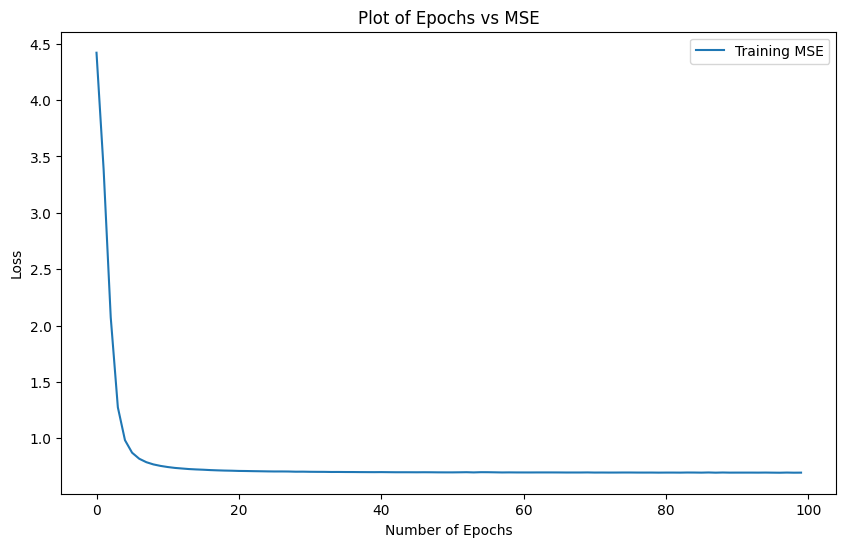

In [27]:
rnn = RNN(1, p)
rnn.compile(loss=loss_fun)
rnn.fit(x_train, y_train)
rnn.plot('Plot of Epochs vs MSE')

Epoch 1/100
32/32 [==============================] - 6s 58ms/step - loss: 3.7146 - accuracy: 0.0055
Epoch 2/100
32/32 [==============================] - 2s 53ms/step - loss: 2.4285 - accuracy: 0.0050
Epoch 3/100
32/32 [==============================] - 2s 57ms/step - loss: 1.5280 - accuracy: 0.0051
Epoch 4/100
32/32 [==============================] - 2s 55ms/step - loss: 1.0985 - accuracy: 0.0050
Epoch 5/100
32/32 [==============================] - 2s 57ms/step - loss: 0.9303 - accuracy: 0.0050
Epoch 6/100
32/32 [==============================] - 2s 57ms/step - loss: 0.8519 - accuracy: 0.0050
Epoch 7/100
32/32 [==============================] - 2s 54ms/step - loss: 0.8093 - accuracy: 0.0050
Epoch 8/100
32/32 [==============================] - 2s 54ms/step - loss: 0.7831 - accuracy: 0.0048
Epoch 9/100
32/32 [==============================] - 2s 52ms/step - loss: 0.7663 - accuracy: 0.0046
Epoch 10/100
32/32 [==============================] - 2s 57ms/step - loss: 0.7530 - accuracy: 0.0047

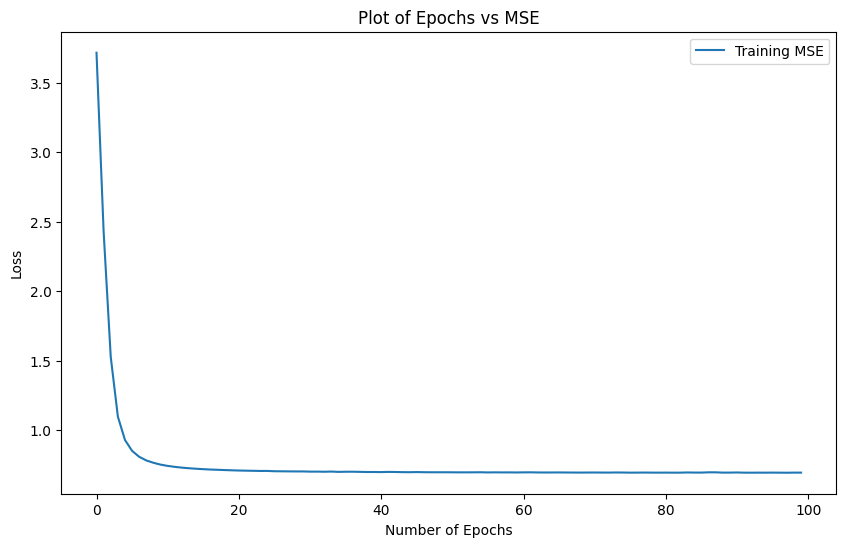

In [28]:
lstm = LSTM(1, p)
lstm.compile(loss=loss_fun)
lstm.fit(x_train, y_train)
lstm.plot('Plot of Epochs vs MSE')

In [29]:
num, n_test = 10, 3000
w_rnn, w_lstm = 0, 0
for _ in range(num):
    x_test, y_test = get_data(p, n_test)
    w_rnn += rnn.evaluate(x_test, y_test)
    w_lstm += lstm.evaluate(x_test, y_test)

print('Average wrong predictions in RNN model: {}'.format(w_rnn/(num*n_test)))
print('Average wrong predictions in LSTM model: {}'.format(w_lstm/(num*n_test)))

94/94 [==============================] - 2s 22ms/step
Average wrong predictions in RNN model: 0.5029
Average wrong predictions in LSTM model: 0.4971
